In [1]:
from cfl.experiment import Experiment
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [2]:
# set user-specific paths here

cfl_path = '/Users/imanwahle/Desktop/cfl'
# cfl_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl'

save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
# save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/examples/exp_results'


X shape: (200, 495)
Y shape: (200, 495)


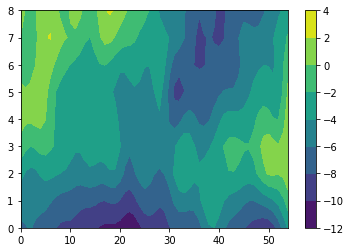

In [3]:
# load data
X, Y, coords = joblib.load(os.path.join(cfl_path, 'data/el_nino/elnino_data.pkl'))
imshape = (55, 9)
X = X[:200,:]
Y = Y[:200,:]
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

# plot an example image
plt.contourf(X[0].reshape(imshape).T)
plt.colorbar()
plt.show()

All results from this run will be saved to /Users/imanwahle/Desktop/cfl/examples/exp_results/experiment0015
opt_config not specified in input, defaulting to {}
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
name not specified in input, defaulting to CondExpMod
best not specified in input, defaulting to True
verbose specified but not used by Kmeans clusterer
Training CFL pipeline.
Train on 150 samples, validate on 50 samples
Epoch 1/2
150/150 [==============================] - 2s 14ms/sample - loss: 5.1573 - val_loss: 1.2687
Epoch 2/2
150/150 [==============================] - 0s 3ms/sample - loss: 3.2507 - val_loss: 1.1273


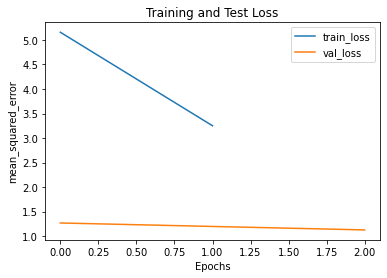

Loading parameters from  tmp_checkpoints/best_weights
Saving parameters to  /Users/imanwahle/Desktop/cfl/examples/exp_results/experiment0015/trained_blocks/CondExpMod


In [4]:
data_info = { 'X_dims' : X.shape, 
              'Y_dims' : Y.shape, 
              'Y_type' : 'continuous' } 

# CDE parameters
lr = 1e-4
CDE_params = { 'batch_size'  : 128,
               'optimizer'   : 'adam',
               'n_epochs'    : 2,
               'dense_units' : [1024, 1024, data_info['Y_dims'][1]],
               'activations' : ['linear', 'linear', 'linear'],
               'dropouts'    : [0.2, 0.5, 0.5],
               'standardize' : True,
               'show_plot' : True
              }

cluster_params = {  'n_Xclusters' : 4,
                    'n_Yclusters' : 4,
                 }   
                            
block_names = ['CondExpMod', 'Kmeans']
block_params = [CDE_params, cluster_params]

my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, verbose=1, results_path=save_path)

train_results = my_exp.train()

In [5]:
print('X macrovariable states:')
train_results['Kmeans']['x_lbls']

X macrovariable states:


array([2, 1, 0, 1, 3, 1, 3, 3, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       1, 2, 3, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 3, 0, 3, 0, 3, 1, 3, 2, 2,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0, 1,
       0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 1, 0, 0, 2, 0, 2, 2, 3, 3, 2, 2,
       0, 1, 2, 0, 2, 3, 2, 2, 3, 0, 2, 2, 3, 3, 1, 0, 3, 2, 0, 1, 0, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 2, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 2, 1, 1, 2, 1, 3, 3, 1, 3, 3, 2,
       3, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 3, 1, 1, 1, 1, 0,
       1, 0, 1, 3, 2, 2, 0, 0, 3, 2, 2, 1, 3, 2, 1, 1, 3, 2, 3, 1, 0, 0,
       3, 0], dtype=int32)

In [6]:
# add a new dataset to this experiment's known set of data sets 

my_exp.add_dataset(X=X, Y=Y, dataset_name='dataset_test')

In [7]:
# run the new dataset through the trained cfl pipeline
pred_results = my_exp.predict('dataset_test')

In [8]:
# ideas for tests:
    # make sure you get an error when you dont supply block names, params or blocks
    # make sure the model is actually running with the params you specified

In [9]:
# load an experiment from saved experiment results (I think)

my_exp2 = Experiment(X_train=X, Y_train=Y, data_info=data_info, 
            past_exp_path=os.path.join(save_path, 'experiment0000'),
            verbose=1, results_path=save_path)

All results from this run will be saved to /Users/imanwahle/Desktop/cfl/examples/exp_results/experiment0016
name specified but not used by Kmeans clusterer
Loading parameters from  /Users/imanwahle/Desktop/cfl/examples/exp_results/experiment0000/trained_blocks/CondExpMod


In [10]:
my_exp2.add_dataset(X=X, Y=Y, dataset_name='dataset_test')

In [11]:
pred2_results = my_exp2.predict('dataset_test')